# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
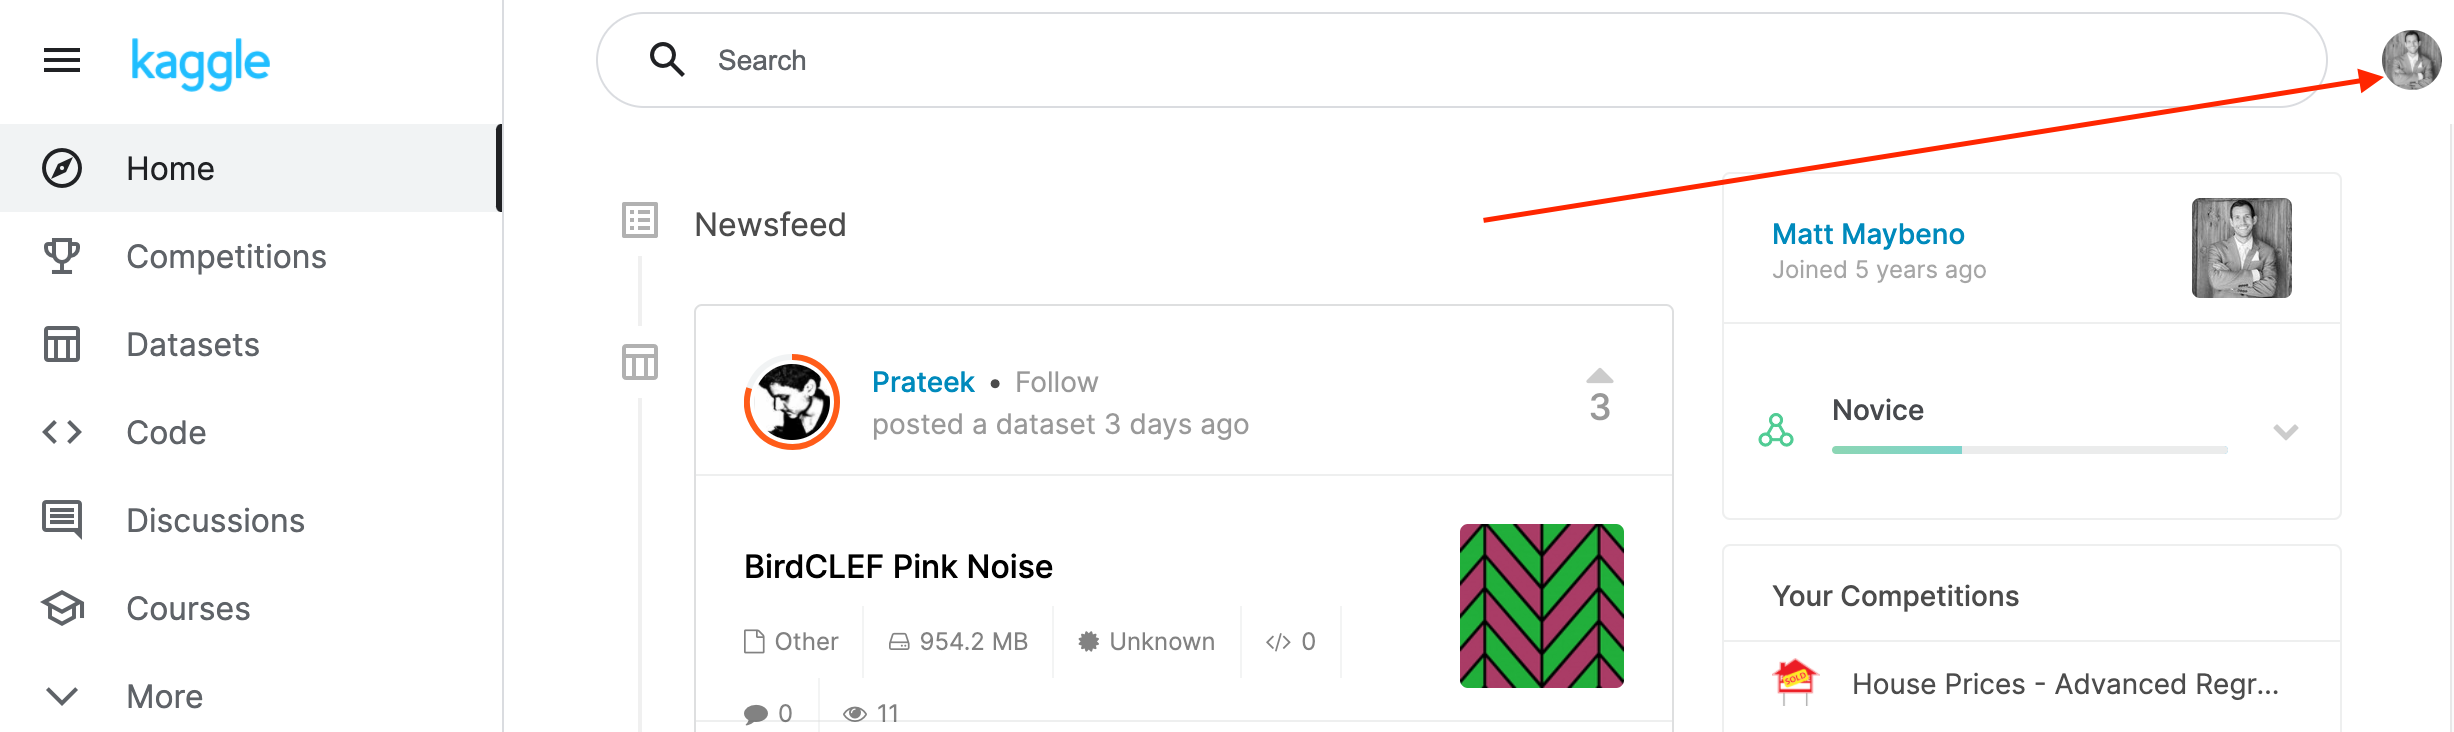
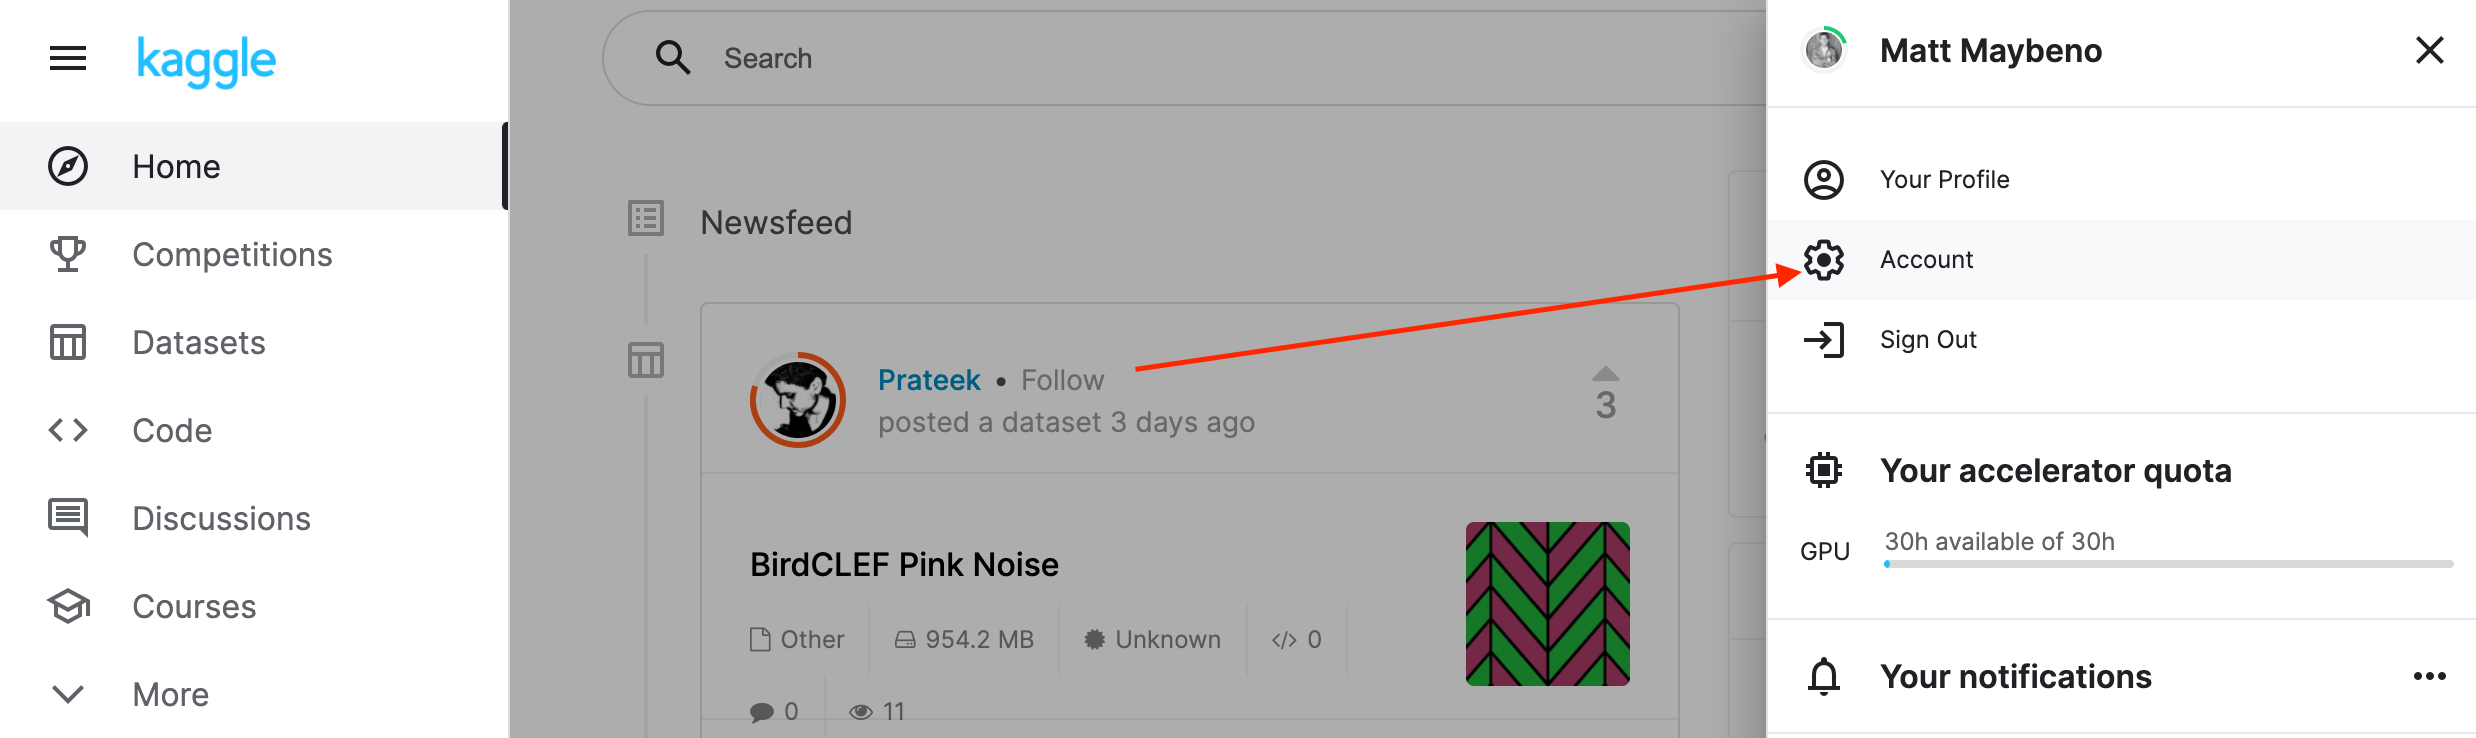
2. Scroll down to API and click Create New API Token.
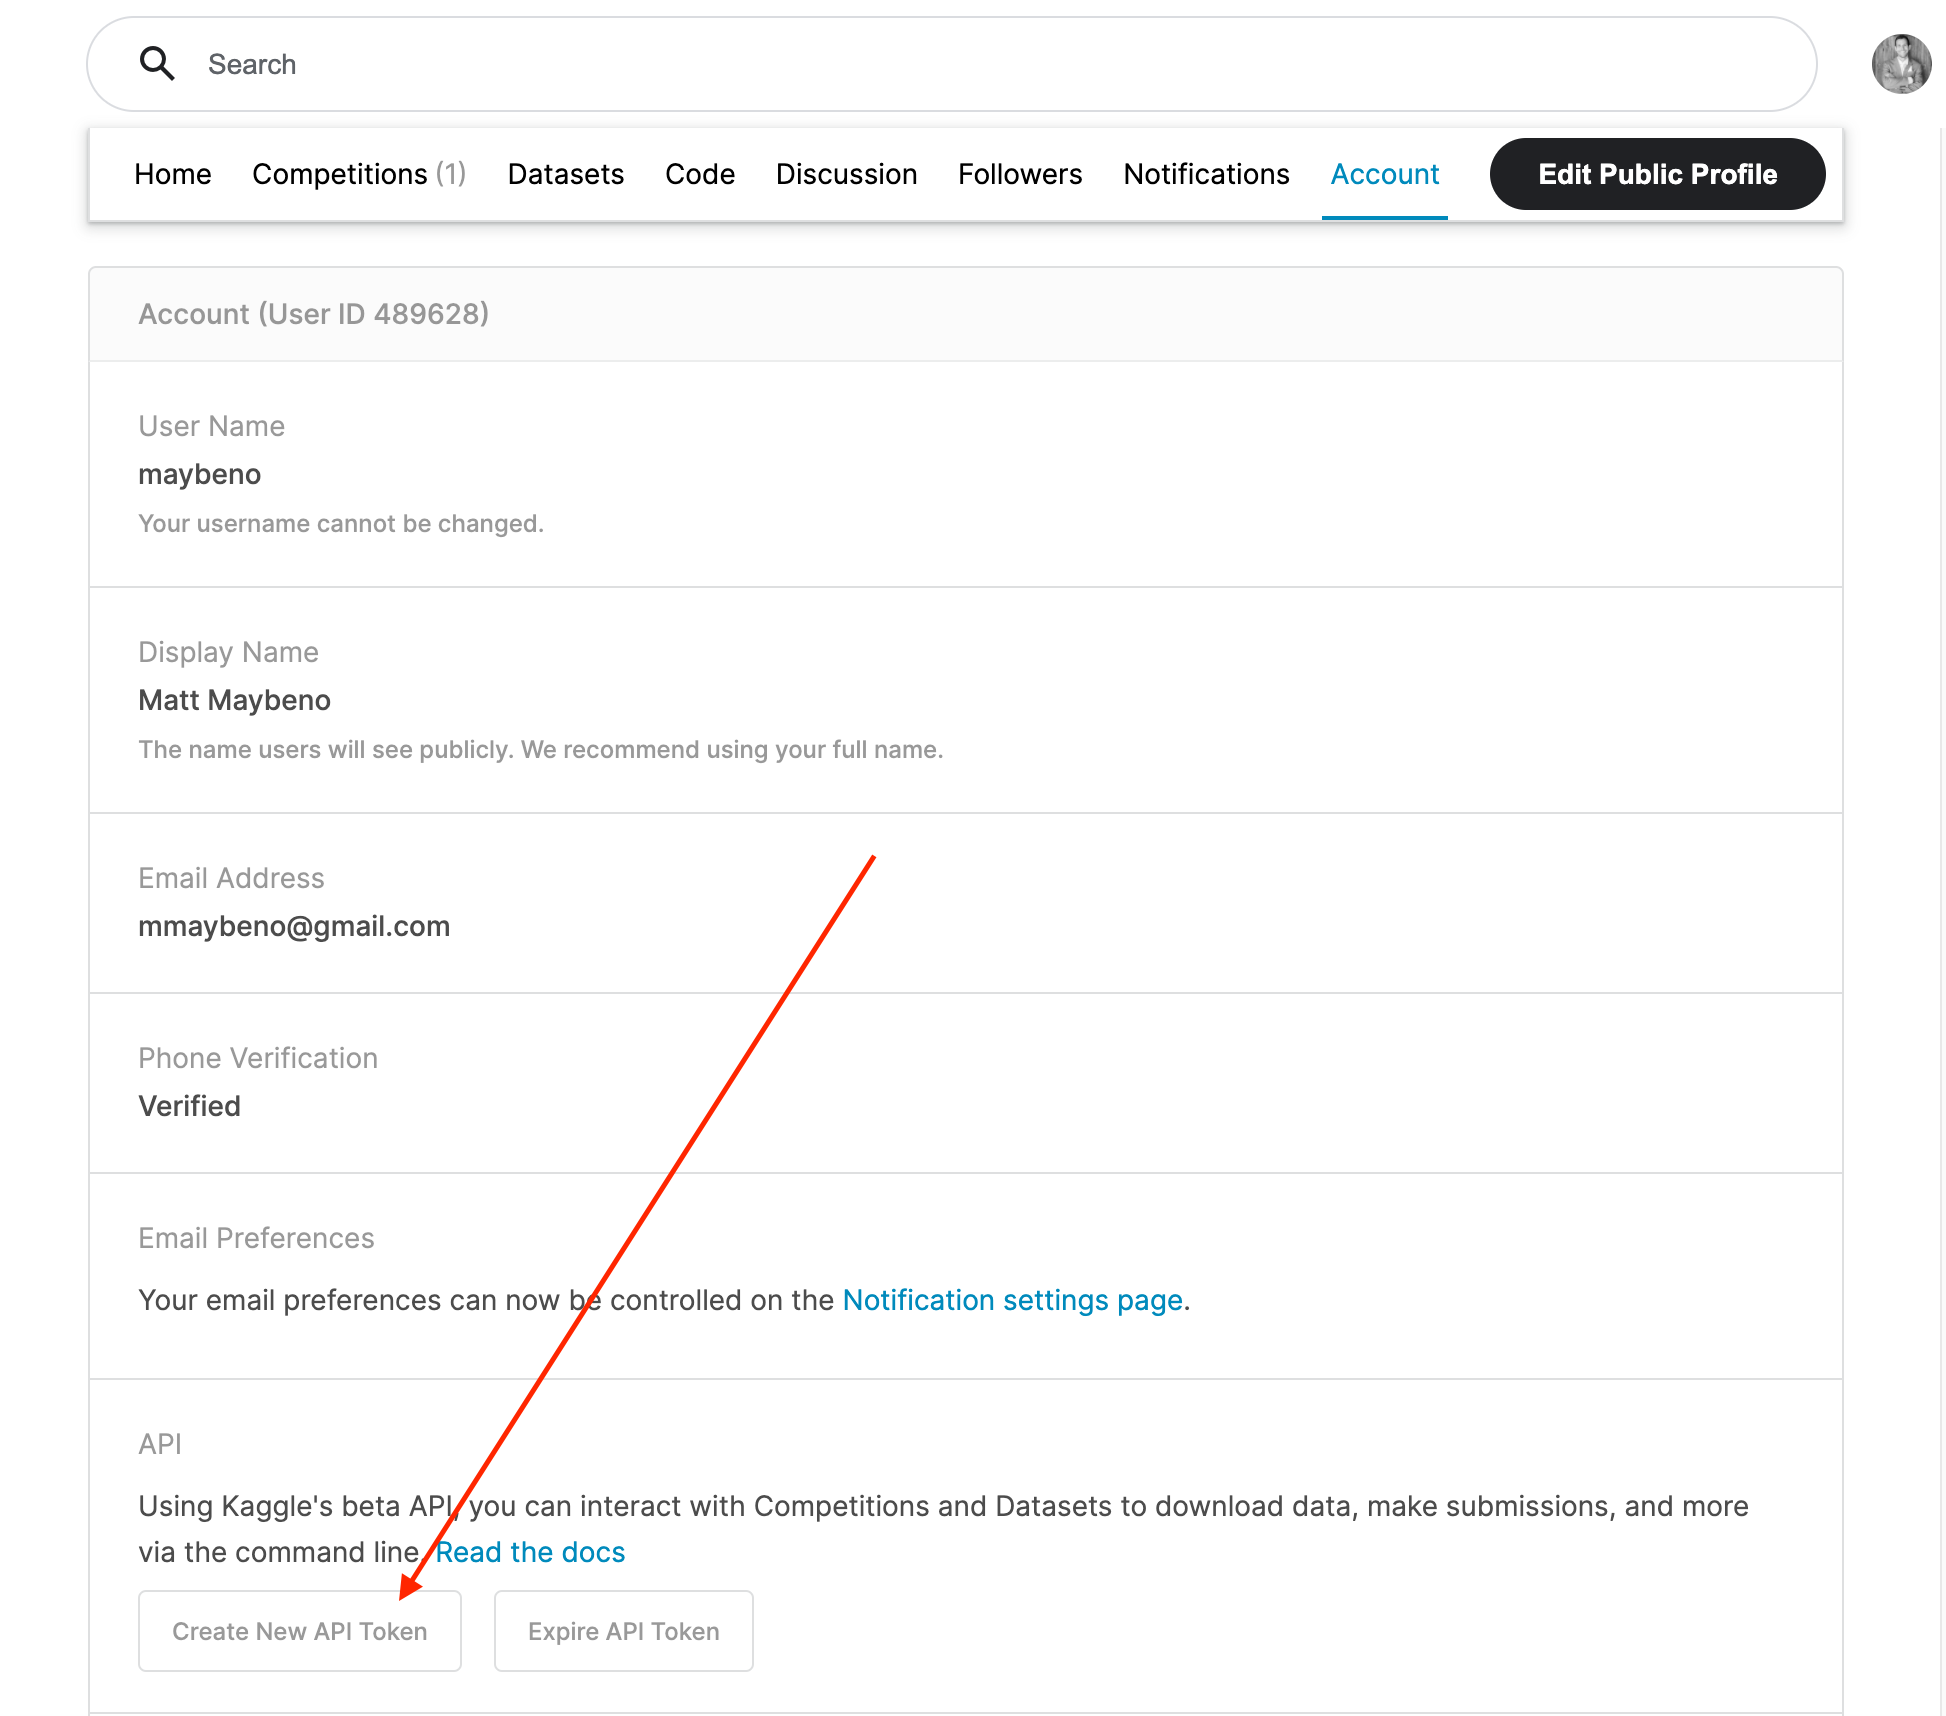
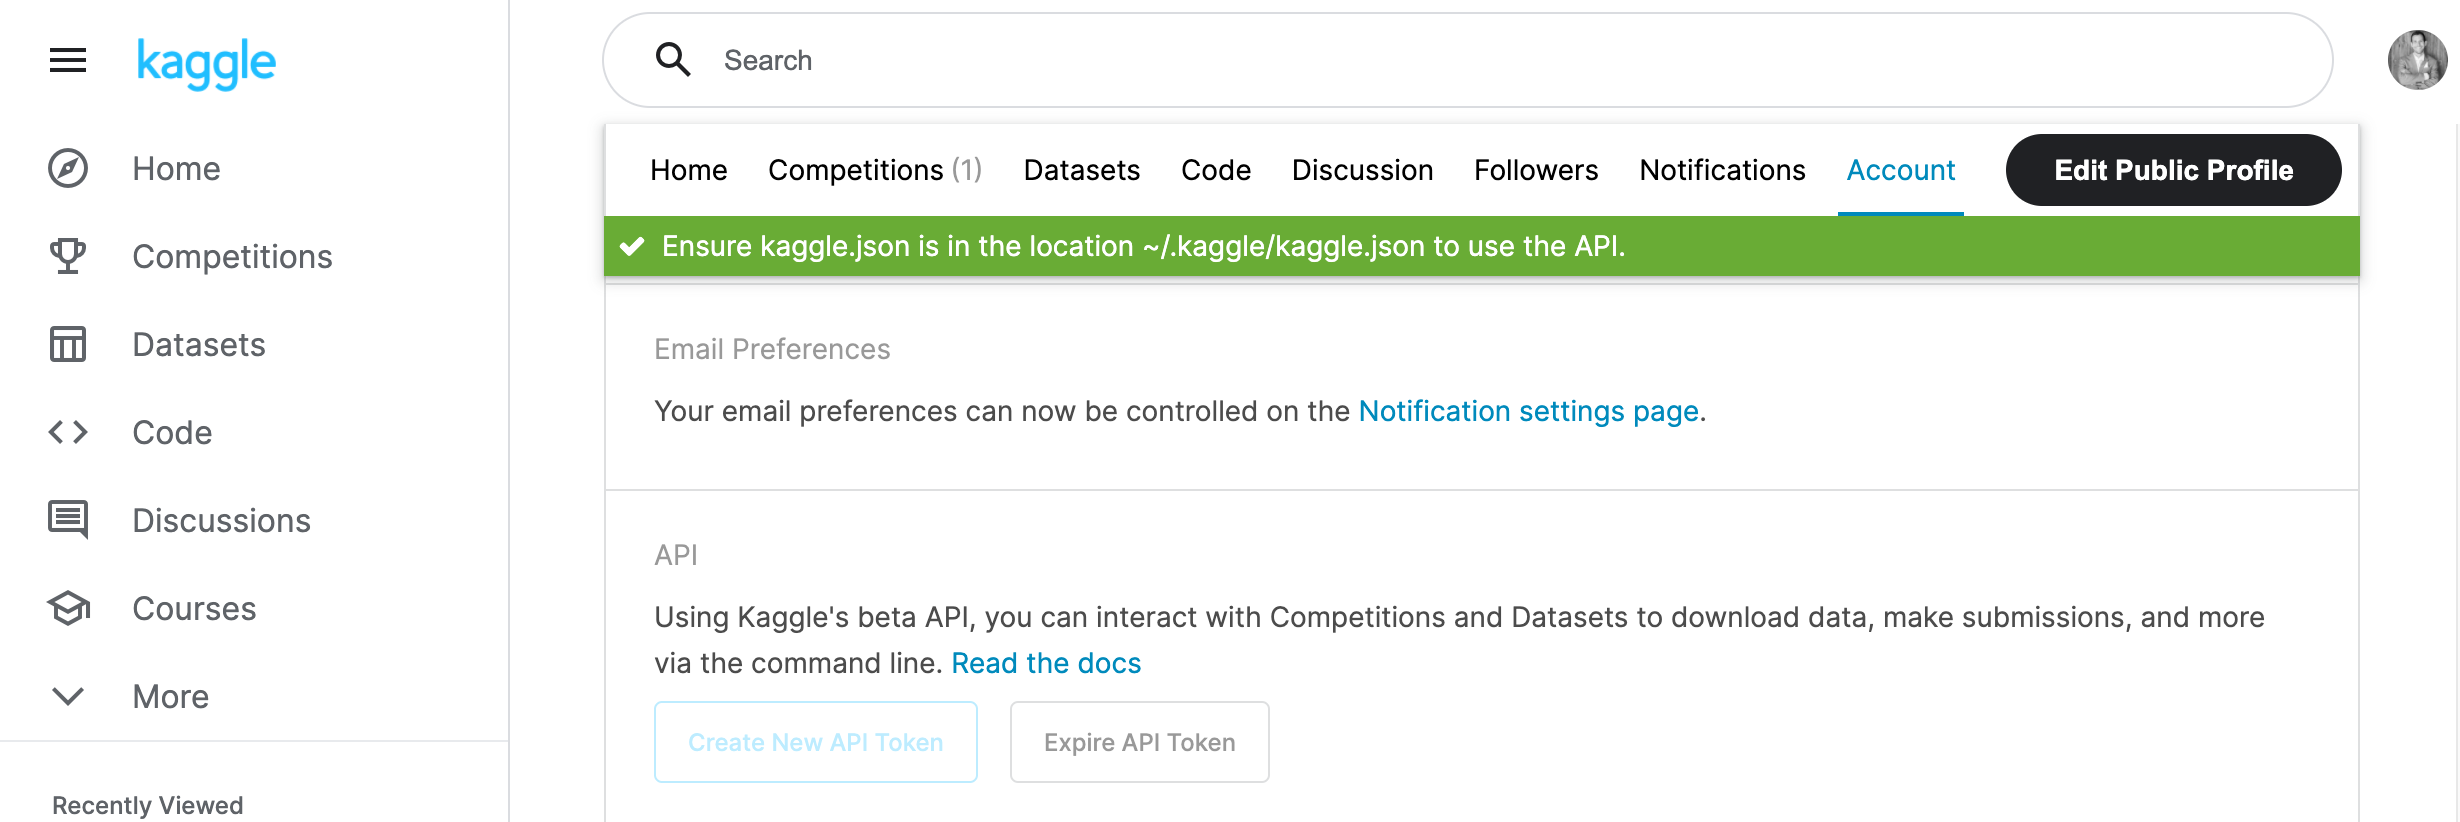
3. Open up `kaggle.json` and use the username and key.
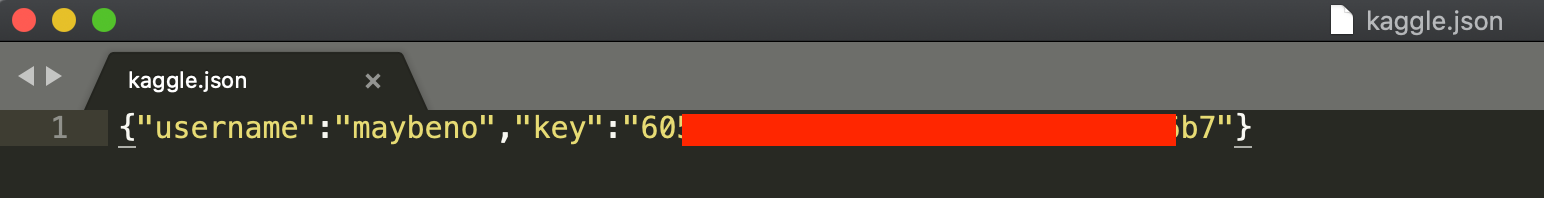

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [4]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Using cached setuptools-72.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-72.1.0-py3-none-any.whl (2.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-

### Setup Kaggle API Key

In [33]:
pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [34]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "akramalselwadi"
kaggle_key = "08cd57255fc259621e80eda92a0671fb"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle(1).json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
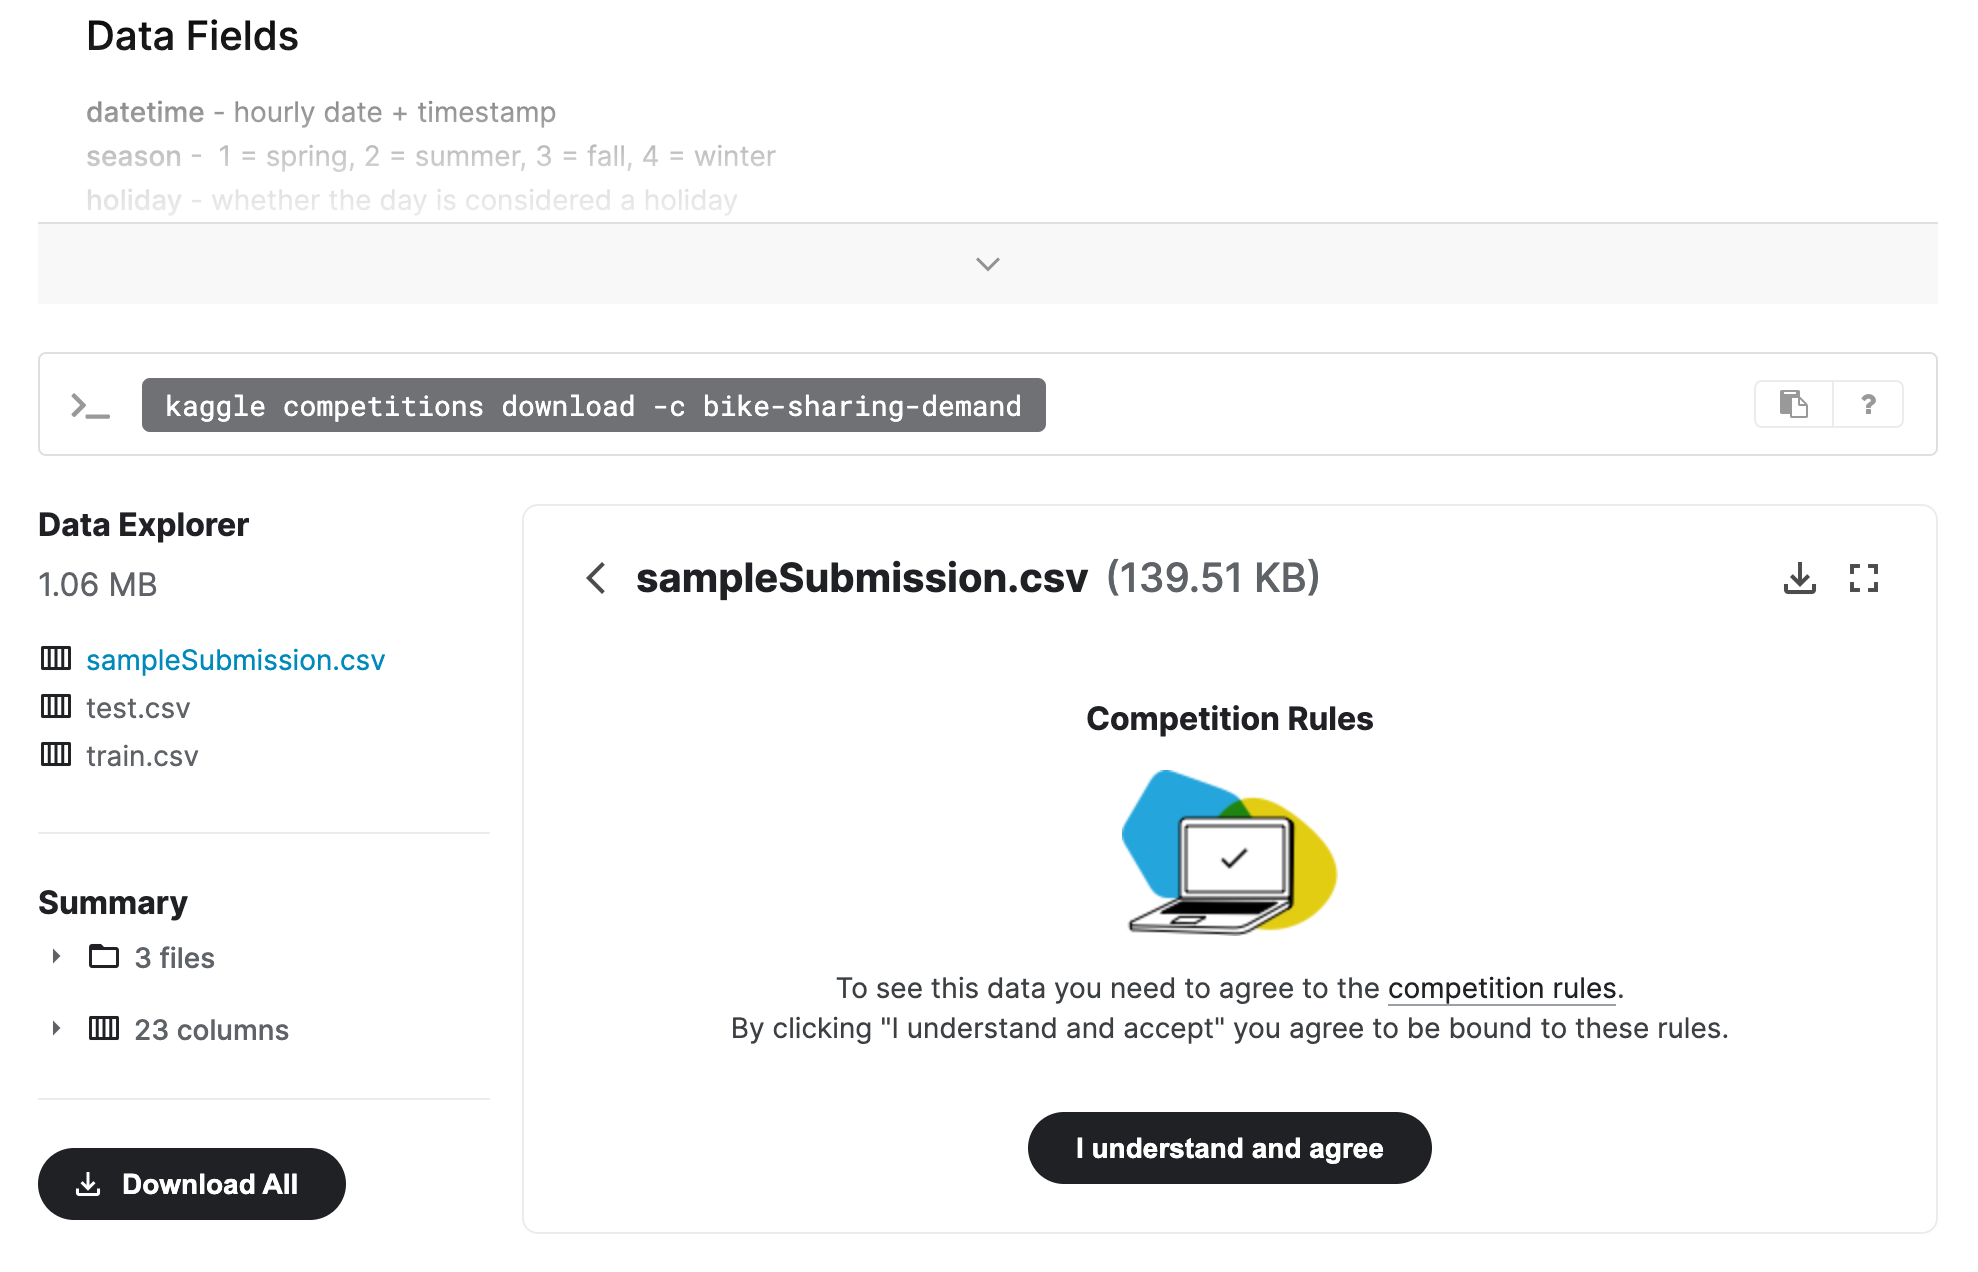

In [7]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

/bin/bash: line 1: kaggle: command not found
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

In [9]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
train.describe()# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [14]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [17]:
test.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [18]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [19]:
#for EDA purposes
print("Shape of train.csv : ", train.shape)
print("Columns of train.csv:", train.columns)
print("\nShape of test.csv: ", test.shape)
print("Columns of test.csv:", test.columns)

Shape of train.csv :  (10886, 12)
Columns of train.csv: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Shape of test.csv:  (6493, 9)
Columns of test.csv: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [20]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [21]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error", 
learner_kwargs = {'ignored_columns':["casual", "registered"]}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240802_185615"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 18 14:00:06 UTC 2024
CPU Count:          2
Memory Avail:       2.84 GB / 3.76 GB (75.5%)
Disk Space Avail:   8589934589.11 GB / 8589934592.00 GB (100.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

(_ray_fit pid=419) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=503) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=530) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=559) [1000]	valid_set's rmse: 135.845 [repeated 3x across cluster]
(_ray_fit pid=530) [7000]	valid_set's rmse: 125.4 [repeated 5x across cluster]
(_ray_fit pid=559) [7000]	valid_set's rmse: 132.416 [repeated 4x across cluster]
(_ray_fit pid=586) [1000]	valid_set's rmse: 137.712 [repeated 2x across cluster]
(_ray_fit pid=586) [4000]	valid_set's rmse: 135.344 [repeated 3x across cluster]
(_ray_fit pid=586) [7000]	valid_set's rmse: 135.236 [repeated 5x across cluster]
(_ray_fit pid=614) [5000]	valid_set's rmse: 137.961 [repeated 4x across cluster]


(_dystack pid=301) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=301) 	80.57s	 = Training   runtime
(_dystack pid=301) 	13.69s	 = Validation runtime
(_dystack pid=301) Fitting model: LightGBM_BAG_L1 ... Training model for up to 2.26s of the 49.74s of remaining time.
(_dystack pid=301) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.44%)
(_dystack pid=301) 	-136.0735	 = Validation score   (-root_mean_squared_error)
(_dystack pid=301) 	21.47s	 = Training   runtime
(_dystack pid=301) 	0.1s	 = Validation runtime
(_dystack pid=301) Fitting model: WeightedEnsemble_L2 ... Training model for up to 142.4s of the 21.8s of remaining time.
(_dystack pid=301) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=301) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=301) 	0.04s	 = Training   runtime
(_dystack pid=301) 	0.0s	 = Validation runtime
(_dystack pid=

(_ray_fit pid=872) [1000]	valid_set's rmse: 69.8551
(_ray_fit pid=871) [1000]	valid_set's rmse: 69.7179
(_ray_fit pid=928) [1000]	valid_set's rmse: 73.1859
(_ray_fit pid=927) [1000]	valid_set's rmse: 78.1608
(_ray_fit pid=983) [1000]	valid_set's rmse: 75.9175
(_ray_fit pid=1044) [1000]	valid_set's rmse: 71.9624


(_dystack pid=301) 	-73.7818	 = Validation score   (-root_mean_squared_error)
(_dystack pid=301) 	42.86s	 = Training   runtime
(_dystack pid=301) 	2.63s	 = Validation runtime
(_dystack pid=301) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.4s of the -28.63s of remaining time.
(_dystack pid=301) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=301) 	-73.7546	 = Validation score   (-root_mean_squared_error)
(_dystack pid=301) 	0.02s	 = Training   runtime
(_dystack pid=301) 	0.0s	 = Validation runtime
(_dystack pid=301) AutoGluon training complete, total runtime = 171.49s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 73.6 rows/s (1210 batch size)
(_dystack pid=301) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240802_185615/ds_sub_fit/sub_fit_ho")
(_dystack pid=301) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leaderboard on holdout data

### Review AutoGluon's training run with ranking of models that did the best.

In [22]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.174104  root_mean_squared_error      24.304279  382.520239                0.000878           0.088529            3       True         12
1   RandomForestMSE_BAG_L2  -53.499962  root_mean_squared_error      19.960158  286.691032                1.140158          42.872725            2       True         11
2          LightGBM_BAG_L2  -55.074970  root_mean_squared_error      19.144309  276.857346                0.324310          33.039039            2       True         10
3        LightGBMXT_BAG_L2  -60.277492  root_mean_squared_error      22.838934  306.519946                4.018934          62.701639            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.065300    0.059711   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.93178448630684,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [23]:
predictions = predictor.predict(test)
predictions.head()

0    23.565670
1    42.165611
2    46.151428
3    49.232315
4    51.829002
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [24]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.526291
std        89.954727
min         3.043394
25%        19.810837
50%        63.999916
75%       167.807938
max       368.575623
Name: count, dtype: float64

In [25]:
# How many negative values do we have?
# Count the number of negative and positive prediction values
negative_pred_count = (predictions < 0).sum()
positive_pred_count = (predictions >= 0).sum()

print("Total predictions                :", len(predictions))
print("Total positive prediction values :", positive_pred_count)
print("Total negative prediction values :", negative_pred_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [26]:
# Set them to zero
# Set negative predictions to zero
predictions[predictions < 0] = 0

# Recheck if there are any negative values left
negative_pred_count = (predictions < 0).sum()
print(f"Current number of negative predictions: {negative_pred_count}")

Current number of negative predictions: 0


### Set predictions to submission dataframe, save, and submit

In [38]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 710kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-08-02 19:13:20  first raw submission 2             complete  1.80607      1.80607       
submission.csv               2024-08-02 19:12:24  first raw submission               complete  1.80607      1.80607       
submission_new_hpo.csv       2024-08-02 05:48:04  new features with hyperparameters  complete  0.53890      0.53890       
submission_new_features.csv  2024-08-02 04:41:34  new features                       complete  0.47874      0.47874       


#### Initial score of `1.80607`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

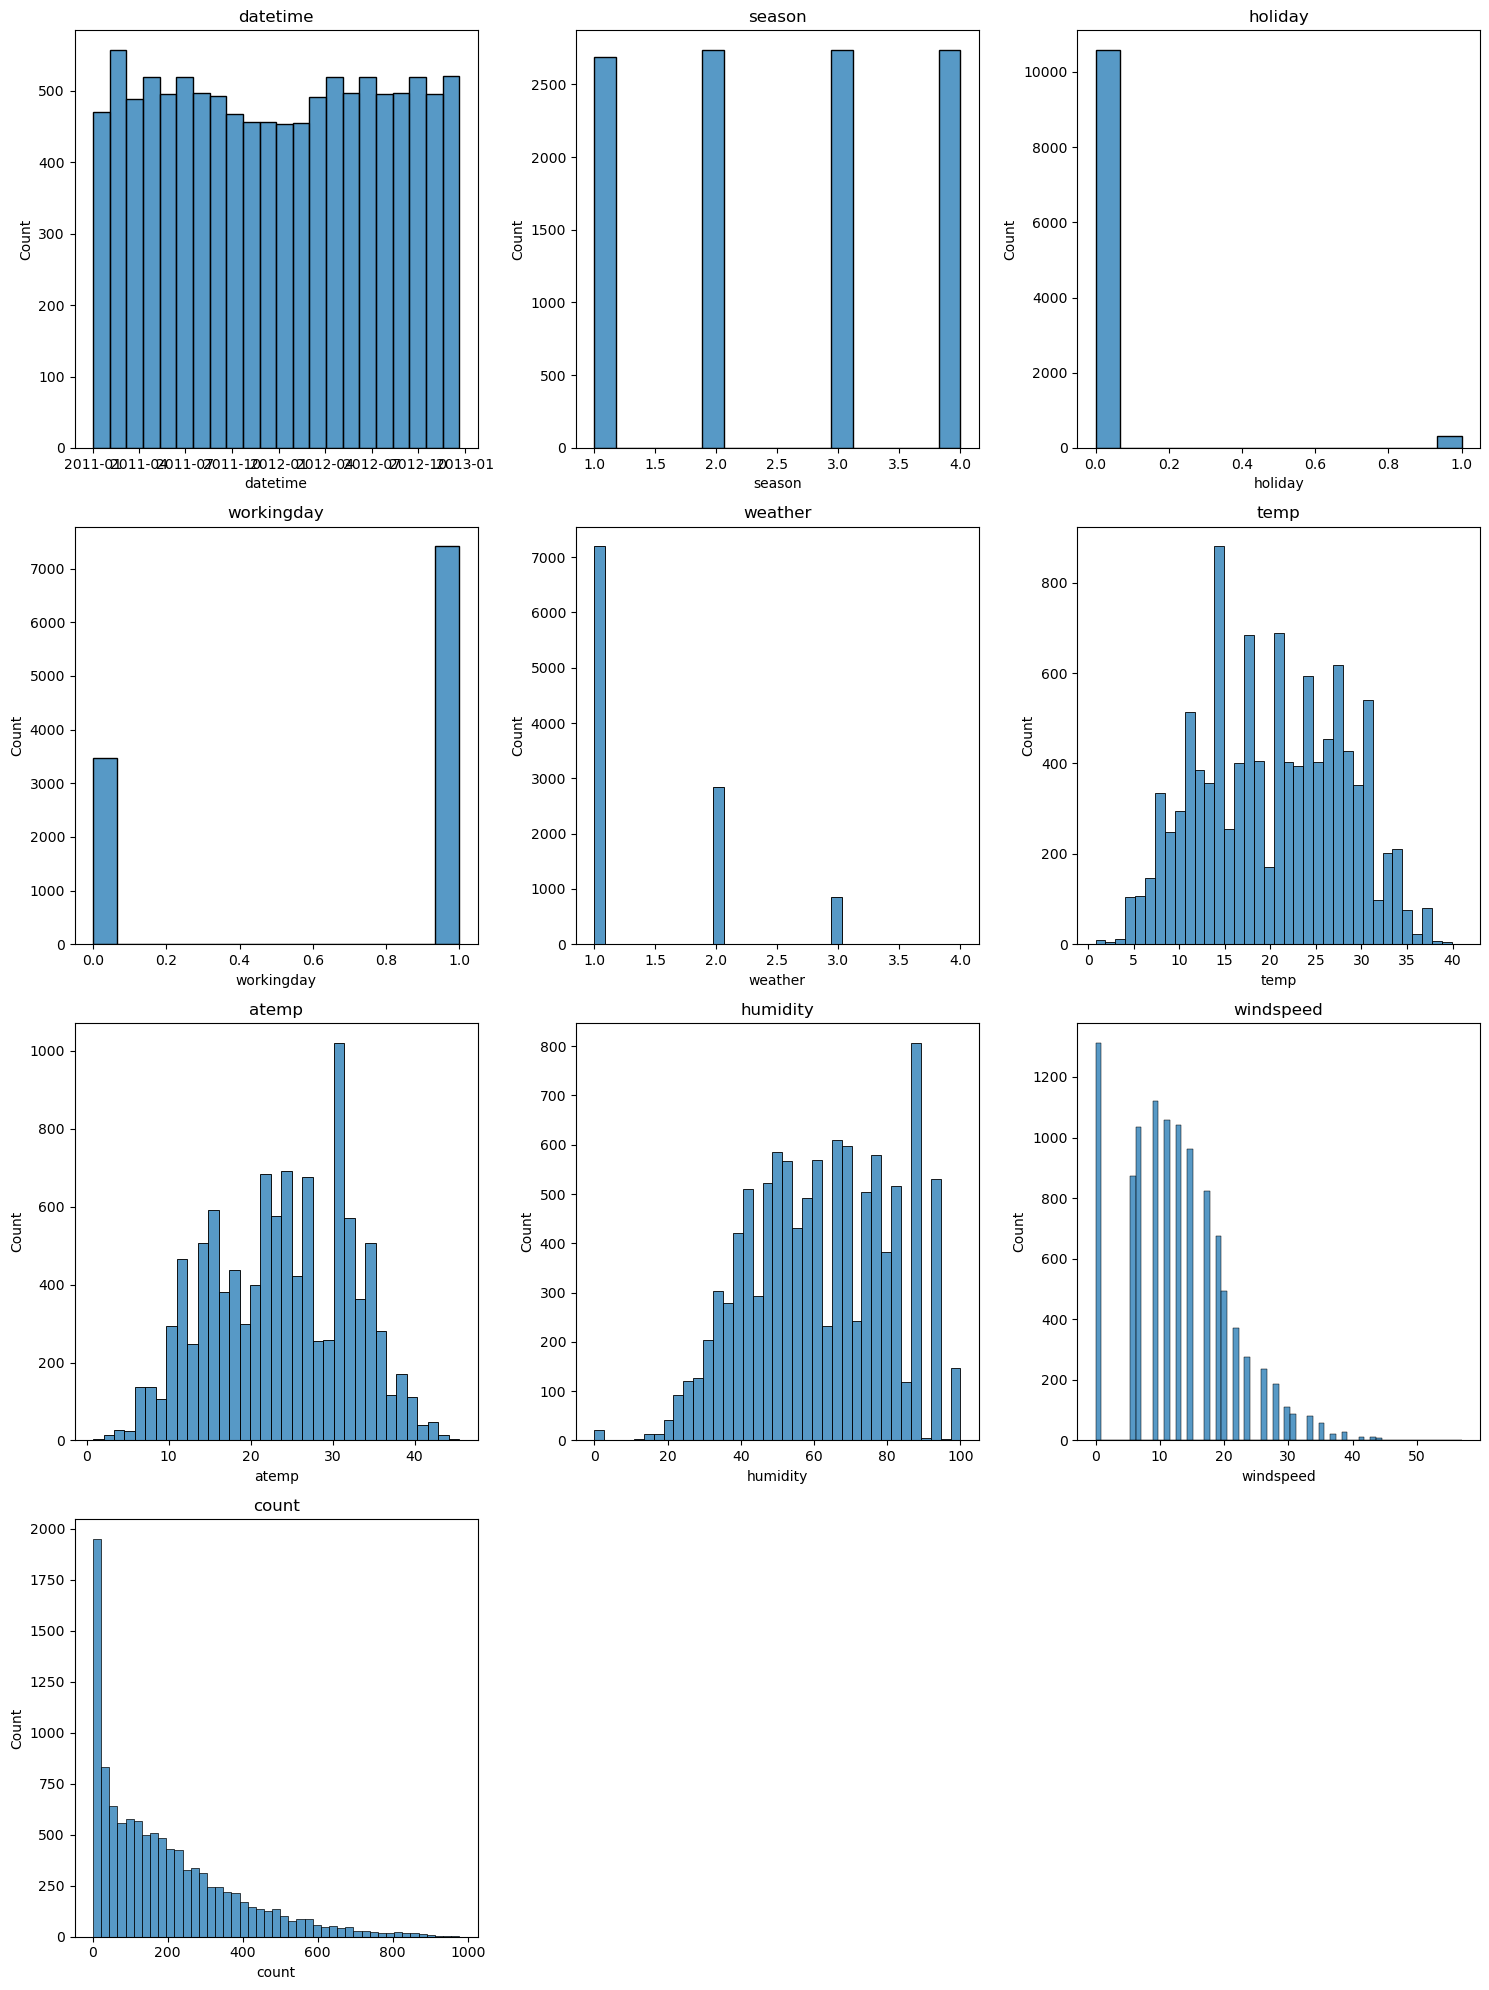

In [42]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
# Plot histograms for the training data, excluding 'casual' and 'registered' columns
columns_to_plot = [col for col in train.columns if col not in ['casual', 'registered']]
num_columns = len(columns_to_plot)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_columns//3 + 1, ncols=3, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(train[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to ensure plots are neatly organized
plt.tight_layout()

# Display the plots
plt.show()

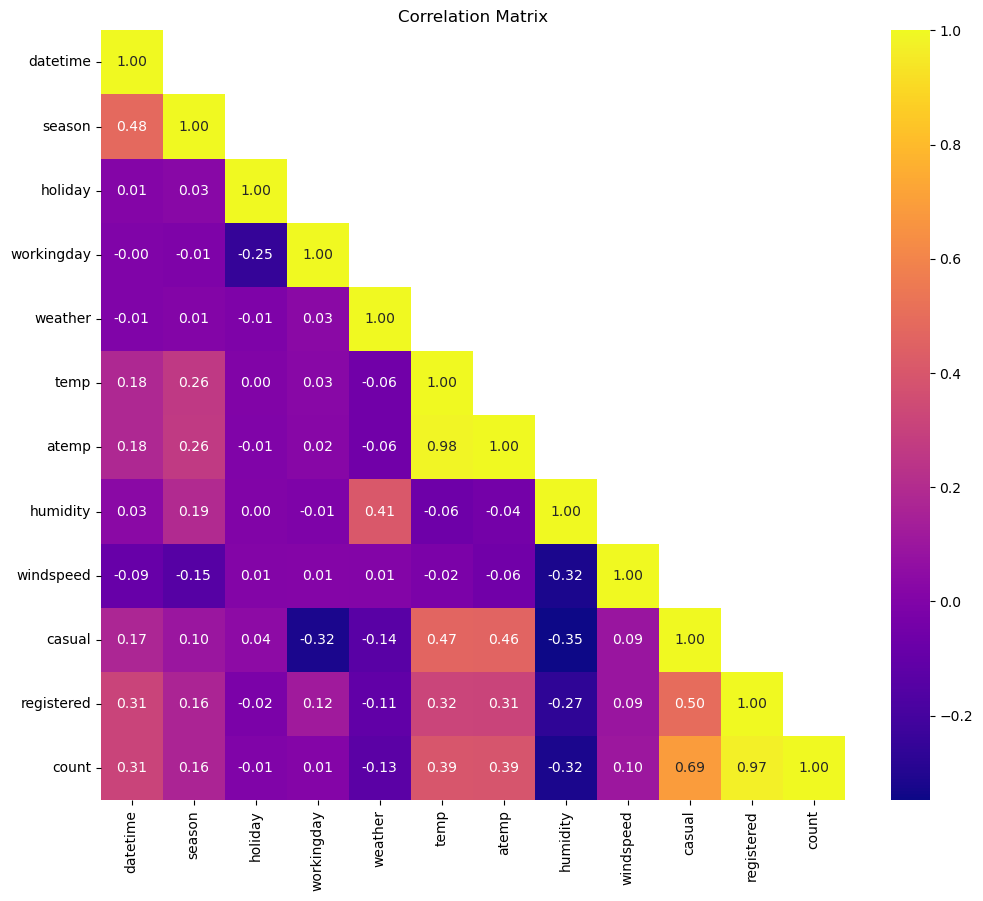

In [43]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f", mask=mask)
plt.title('Correlation Matrix')
# Display the correlation matrix
plt.show()

In [44]:
# create a new feature
# Splitting the 'datetime' feature in test data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)

# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True) 

In [45]:
train.head() #checking it out

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [46]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [47]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [48]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


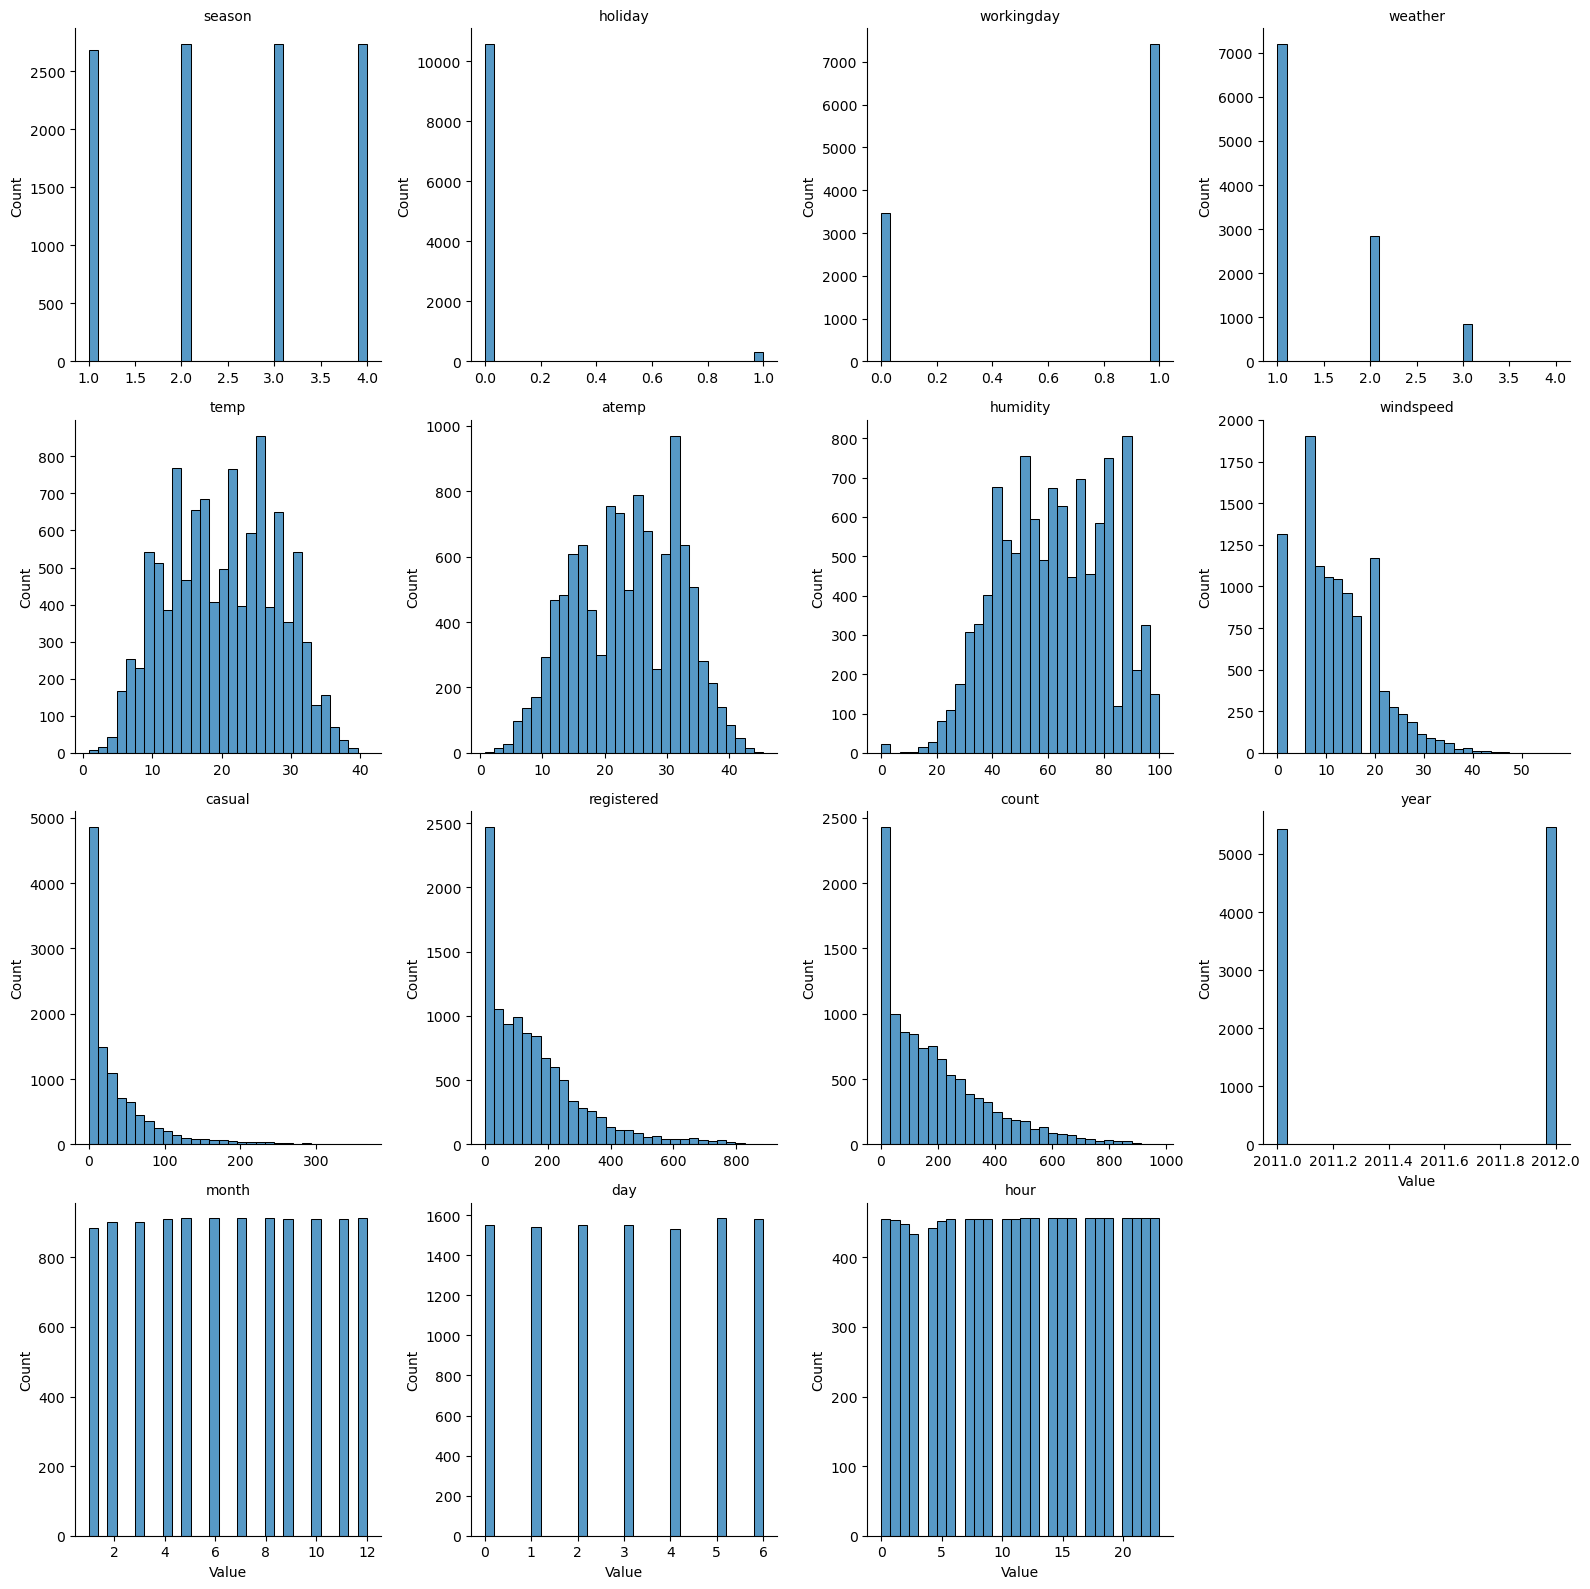

In [49]:
# View histogram of all features again now with the hour feature
melted_train = pd.melt(train, var_name='Feature', value_name='Value')

# Plot histograms using Seaborn's FacetGrid
g = sns.FacetGrid(melted_train, col='Feature', col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', bins=30, kde=False)  # Adjust bins and KDE as needed
g.set_titles(col_template="{col_name}")

# Adjust layout for better appearance
plt.tight_layout()

# Display the histograms
plt.show()

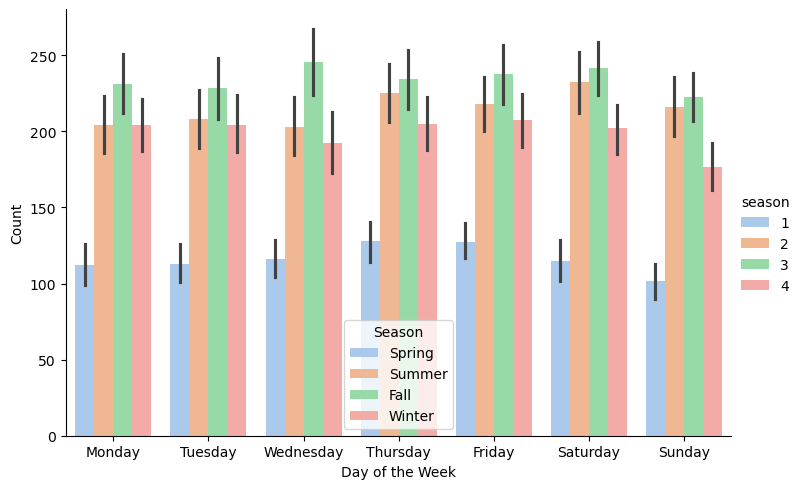

In [50]:
# Plot variation in 'count' with respect to 'day' using a bar seaborn plot based 
g = sns.catplot(
    x="day", 
    y="count", 
    data=train, 
    kind='bar', 
    height=5, 
    aspect=1.5,
    hue='season',            # Add hue based on 'season'
    palette='pastel'         # Use the pastel color palette
)

# Customize x-axis labels to show days of the week
plt.xticks(
    ticks=range(7), 
    labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Set axis labels and title for clarity
g.set_axis_labels('Day of the Week', 'Count')
g.set_titles('Variation in Count by Day and Season')

# Update the legend labels to categorical names
# Retrieve current legend handles and labels from the FacetGrid
handles, labels = g.ax.get_legend_handles_labels()

# Define the categorical names corresponding to the 'season' values
categorical_names = {
    '1': 'Spring',     # Assuming 'season' has these numeric values
    '2': 'Summer',
    '3': 'Fall',
    '4': 'Winter'
}

# Replace numeric labels with categorical names
new_labels = [categorical_names[label] for label in labels]

# Update the legend with new labels
g.ax.legend(handles, new_labels, title='Season')


# Display the plot
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [51]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error", 
learner_kwargs = {'ignored_columns':["casual", "registered"]}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240802_191424"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.6
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 18 14:00:06 UTC 2024
CPU Count:          2
Memory Avail:       1.71 GB / 3.76 GB (45.3%)
Disk Space Avail:   8589934589.11 GB / 8589934592.00 GB (100.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fi

In [53]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.957602  root_mean_squared_error      23.803438  360.840249                0.000803           0.040250            3       True         13
1      WeightedEnsemble_L2  -34.250348  root_mean_squared_error      21.884974  261.378010                0.000757           0.046483            2       True          8
2          CatBoost_BAG_L2  -34.336981  root_mean_squared_error      22.334514  293.110634                0.090289          31.646714            2       True         12
3          LightGBM_BAG_L2  -34.485859  root_mean_squared_error      22.399121  285.241817                0.154896          23.777897            2       True         10
4   RandomForestMSE_BAG_L2  -34.715911  root_mean_squared_error      23.557450  305.375389   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.15711242835349,
  'LightGBMXT_BAG_L1': -36.45988391821316,
  'LightGBM_BAG_L1': -35.79686905713535,
  'RandomForestMSE_BAG_L1': -39.587440921643605,
  'CatBoost_BAG_L1': -36.73795159669016,
  'ExtraTree

In [54]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    13.612400
1     5.869151
2     4.254447
3     3.556680
4     3.419170
Name: count, dtype: float32

In [55]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

# Recheck if there are any negative values left
negative_pred_count = (predictions_new_features < 0).sum()
print(f"Current number of negative predictions: {negative_pred_count}")
print("All negative values in the predictions have been set to zero.")

Current number of negative predictions: 0
All negative values in the predictions have been set to zero.


In [56]:
# Why not include this??? it took FOREVER!!!!
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [57]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 628kB/s]
Successfully submitted to Bike Sharing Demand

In [59]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-08-02 19:31:35  new features 2                     complete  0.46202      0.46202       
submission.csv               2024-08-02 19:13:20  first raw submission 2             complete  1.80607      1.80607       
submission.csv               2024-08-02 19:12:24  first raw submission               complete  1.80607      1.80607       
submission_new_hpo.csv       2024-08-02 05:48:04  new features with hyperparameters  complete  0.53890      0.53890       


#### New Score of `0.46202`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [60]:
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

In [61]:
# Define hyperparameters for individual models. Jesus Christ the amount of time I spent here because there is nothing
#in this course that covers this id absolutly riduclous. I don't think you actually want people to learn an


nn_hyperparameters = {
    'num_epochs': 5,
    'learning_rate': [1e-4, 1e-3, 1e-2],
    'activation': ['relu', 'softrelu', 'tanh'],
    'dropout_prob': [0.0, 0.1, 0.2, 0.5]
}

gbm_hyperparameters = [
    {'extra_trees': True, 
     'num_boost_round': [100, 200, 300, 400, 500],
     'num_leaves': [25, 36, 64],
     'ag_args': {'name_suffix': 'XT'}},
    {},
    'GBMLarge'
]

hyperparameters = {
    'GBM': gbm_hyperparameters,
    'NN_TORCH': nn_hyperparameters,
}

tuning_config = { 
    'num_trials': 20,
    'scheduler': 'local',
    'searcher': 'auto'
}

predictor = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets='optimize_for_deployment',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=tuning_config,
    refit_full='best'
)


2024-08-02 19:36:41,045	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/root/AWS_MLEud/cd0385-project-starter/project/AutogluonModels/ag-20240802_193211/models/NeuralNetTorch' in 0.0940s.
2024-08-02 19:36:41,151	WARNING experiment_analysis.py:190 -- Failed to fetch metrics for 20 trial(s):
- be5460ea: FileNotFoundError('Could not fetch metrics for be5460ea: both result.json and progress.csv were not found at /root/AWS_MLEud/cd0385-project-starter/project/AutogluonModels/ag-20240802_193211/models/NeuralNetTorch/be5460ea')
- 4fe789ca: FileNotFoundError('Could not fetch metrics for 4fe789ca: both result.json and progress.csv were not found at /root/AWS_MLEud/cd0385-project-starter/project/AutogluonModels/ag-20240802_193211/models/NeuralNetTorch/4fe789ca')
- 0dde15dc: FileNotFoundError('Could not fetch metrics for 0dde15dc: both result.json and progress.csv were not found at /root/AWS_MLEud/cd0385-project-starter/project/AutogluonModels/ag-202408

[1000]	valid_set's rmse: 38.5198


	-38.3822	 = Validation score   (-root_mean_squared_error)
	3.62s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 297.73s of remaining time.
	Ensemble Weights: {'LightGBM/T12': 0.391, 'LightGBM/T6': 0.348, 'LightGBM/T11': 0.261}
	-37.3346	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 302.6s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 771.7 rows/s (2178 batch size)
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to th

In [62]:
#load trained model. 
predictor_new_hpo = TabularPredictor.load("AutogluonModels/ag-20240802_193211")

In [70]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.334582  root_mean_squared_error       2.822304  20.217255                0.000592           0.019152            2       True          4
1         LightGBM/T12 -38.007447  root_mean_squared_error       1.172213   7.718019                1.172213           7.718019            1       True          3
2         LightGBM/T11 -38.050854  root_mean_squared_error       0.781891   6.312126                0.781891           6.312126            1       True          2
3          LightGBM/T6 -38.341211  root_mean_squared_error       0.867608   6.167957                0.867608           6.167957            1       True          1
Number of models trained: 4
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T6': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T6': -38.341210542502,
  'LightGBM/T11': -38.05085373744469,
  'LightGBM/T12': -38.00744712429987,
  'WeightedEnsemble_L2': -37.33458160824363},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T6': ['LightGBM', 'T6'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'LightGBM/T12': ['LightGBM', 'T12'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T6': 6.167957067489624,
  'LightGBM/T11': 6.312126159667969,
  'LightGBM/T12': 7.718019247055054,
  'WeightedEnsemble_L2': 0.019152402877807617},
 'model_pred_times': {'LightGBM/T6': 0.8676083087921143,
  'LightGBM/T11': 0.781890869140625,
  'LightGBM/T12': 1.1722133159637451,
  'WeightedEnsemble_L2': 0.0005919933319091797},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/T6': {'learni

In [71]:
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=False))
leaderboard_new_hpo_df.head()

                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -37.334582  root_mean_squared_error       2.822304  20.217255                0.000592           0.019152            2       True          4
1         LightGBM/T12 -38.007447  root_mean_squared_error       1.172213   7.718019                1.172213           7.718019            1       True          3
2         LightGBM/T11 -38.050854  root_mean_squared_error       0.781891   6.312126                0.781891           6.312126            1       True          2
3          LightGBM/T6 -38.341211  root_mean_squared_error       0.867608   6.167957                0.867608           6.167957            1       True          1


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-37.334582,root_mean_squared_error,2.822304,20.217255,0.000592,0.019152,2,True,4
1,LightGBM/T12,-38.007447,root_mean_squared_error,1.172213,7.718019,1.172213,7.718019,1,True,3
2,LightGBM/T11,-38.050854,root_mean_squared_error,0.781891,6.312126,0.781891,6.312126,1,True,2
3,LightGBM/T6,-38.341211,root_mean_squared_error,0.867608,6.167957,0.867608,6.167957,1,True,1


In [72]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    18.974102
1     3.479199
2     0.364897
3     0.320384
4     0.339327
Name: count, dtype: float32

In [73]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

# Recheck if there are any negative values left
negative_pred_count = (predictions_new_hpo < 0).sum()
print(f"Current number of negative predictions: {negative_pred_count}")
print("All negative values in the predictions have been set to zero.")

Current number of negative predictions: 0
All negative values in the predictions have been set to zero.


In [74]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [75]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [76]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters 2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 742kB/s]
Successfully submitted to Bike Sharing Demand

In [77]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-08-02 19:44:32  new features with hyperparameters 2  complete  0.53890      0.53890       
submission_new_hpo.csv       2024-08-02 19:40:04  new features with hyperparameters 2  complete  0.53890      0.53890       
submission_new_features.csv  2024-08-02 19:31:35  new features 2                       complete  0.46202      0.46202       
submission.csv               2024-08-02 19:13:20  first raw submission 2               complete  1.80607      1.80607       


#### New Score of `0.5389`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

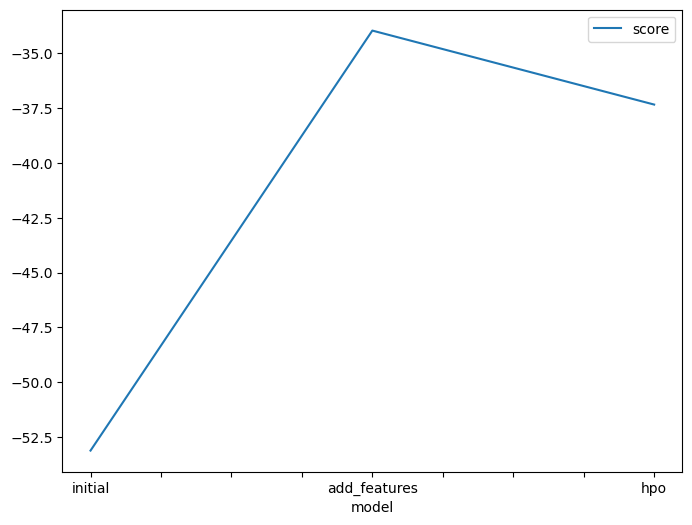

In [78]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.126780, -33.957602, -37.334582]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

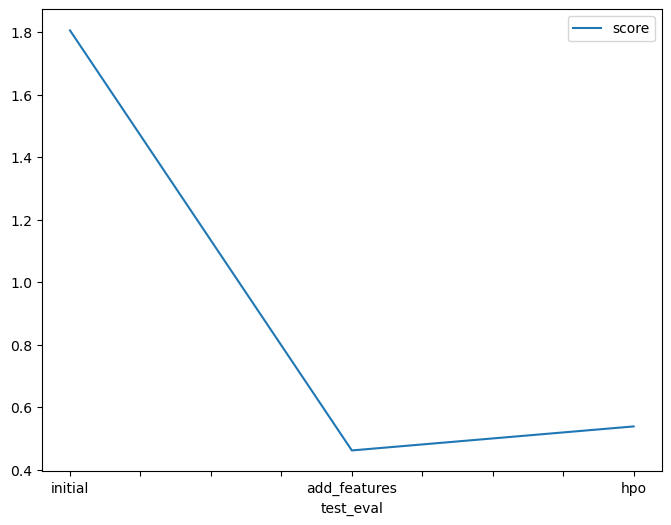

In [79]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80607, 0.46202, 0.53890]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [80]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='optimize_for_deployment'"],
    "hp-method": ["none", "problem_type = 'regression'", "tabular autogluon"],
    "score": [1.80148, 0.47874, 0.53890]
             })

,model,timelimit,presets,hp-method,score
0,initial,time_limit = 600,presets='best_quality',none,1.80148
1,add_features,time_limit=600,presets='best_quality',problem_type = 'regression',0.47874
2,hpo,time_limit=600,presets='optimize_for_deployment',tabular autogluon,0.53890
